### パラメータ推定 s1 only

In [1]:
include("../../src/function/main_function.jl");

In [2]:
using NPZ

cov_mat_scal = npzread("../../covariance_matrix/cov_mat_scal.npy")
cov_mat_tens = npzread("../../covariance_matrix/cov_mat_tens.npy");

### パラメータセット

In [3]:
nside = 4
r =0.;

In [4]:
# litebirdの周波数を選んで
# 色々なバンドで試す

freq_band_case1 = [40, 68, 100]
freq_band_case2 = [40, 50, 100]
which_model = "s1"
cmb_freq = 100;

In [14]:
# スレッドセーフな計算 push!は使うな

times = 1000

r_array_case1 = zeros(times)
r_array_case2 = zeros(times)

beta_array_case1 = zeros(times)
beta_array_case2 = zeros(times)

accuracy_r, accuracy_like = 1e-5, 1e-2

@time @inbounds @threads for seed in 1:times

    # r_like_estimate_fast(r_ini, num_iterations, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens)
    r_array, beta_array, optimum_r1, optimum_beta_s1 = r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case1, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);
    r_array, beta_array, optimum_r2, optimum_beta_s2 = r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case2, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);

    # case1 [40, 68, 100]
    r_array_case1[seed] = optimum_r1
    beta_array_case1[seed] = optimum_beta_s1

    # case2 [40, 50, 100]
    r_array_case2[seed] = optimum_r2
    beta_array_case2[seed] = optimum_beta_s2
    
    #print(seed)

end

683.726340 seconds (160.54 M allocations: 2.131 TiB, 1.87% gc time, 0.01% compilation time)


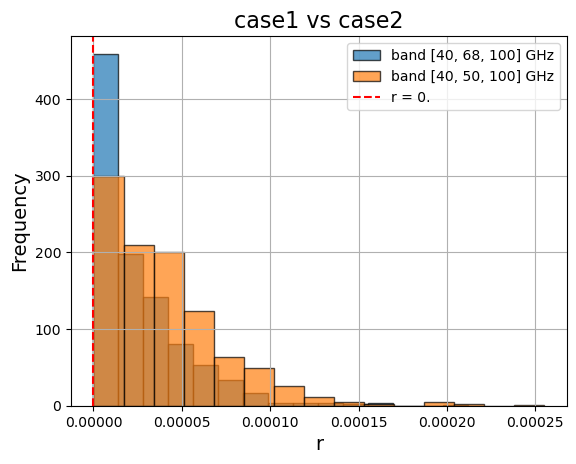

In [39]:
using PyPlot 

# histogram
hist(r_array_case1, bins = 15, alpha = 0.7, edgecolor = "black", label = "band [40, 68, 100] GHz")
hist(r_array_case2, bins = 15, alpha = 0.7, edgecolor = "black", label = "band [40, 50, 100] GHz")

PyPlot.axvline(x = 0., color = "red", linestyle = "--", label = "r = 0.")

title("case1 vs case2", fontsize = 16)
xlabel("r", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [16]:
# 95%CL
std(r_array_case1) * 1.96
std(r_array_case2) * 1.96

6.82304147409399e-5

In [17]:
# 68%CL Δr
println("Δr_case1 =", std(r_array_case1))
println("Δr_case2 =", std(r_array_case2))

Δr_case1 =2.7879398274792593e-5
Δr_case2 =3.481143609231628e-5


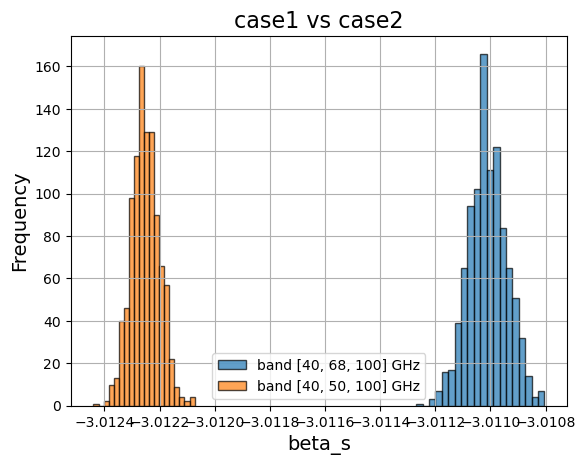

In [18]:
using PyPlot 

# histogram
hist(beta_array_case1, bins=20, alpha=0.7, edgecolor="black", label = "band [40, 68, 100] GHz")
hist(beta_array_case2, bins=20, alpha=0.7, edgecolor="black", label = "band [40, 50, 100] GHz")

title("case1 vs case2", fontsize = 16)
xlabel("beta_s", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true):
PyPlot.legend()

show()

In [19]:
println("case1 r = ", mean(r_array_case1))
println("case2 r = ", mean(r_array_case2))

case1 r = 2.4672691465405265e-5
case2 r = 3.8999705236582075e-5


In [20]:
println("case1 beta = ", mean(beta_array_case1))
println("case2 beta = ", mean(beta_array_case2))

case1 beta = -3.0110115399591453
case2 beta = -3.012252162564509
